# HW0 Monty Hall problem
Taken from **Toevalislogisch.pdf** K. Landsman, Radboud Universiteit Nijmegen, NL.

### Problem description in Dutch 
Wie kent het driedeurenprobleem niet? Al was het maar onder de alternatieve namen
Monty Hall Problem (vernoemd naar de presentator van de spelshow Let's make a deal
waarin de hieronder beschreven situatie zich daadwerkelijk voordeed), Willem Ruis Probleem,
Ziegenproblem (waarbij het opmerkelijk is dat onze met auto’s geobsedeerde oosterburen
het niet over das Autoproblem hebben!), enzovoort. Het probleem kreeg grote
bekendheid toen een Marilyn Savant Vos (volgens het Guinness Book of Records de intelligentste
vrouw ter wereld) er in 1990 over schreef in haar column Ask Marilyn in het Amerikaanse
tijdschrift Parade Magazine, waarin ze wekelijks wiskundevragen van lezers beantwoorde.
Ofschoon het probleem toen in alle mogelijke herformuleringen al lang bekend
was, is het sindsdien een klassieker uit de kansrekening waarover talloze artikelen en internetsites
bestaan; Pfaltzgraff (2006) en Tijms (2002) besteden er bijvoorbeeld aandacht
aan. Zie ook de leuke presentatie op kennislink door Van den Brandhof (2006).
Stel je bent beland in de finale van een spelshow en staat voor 3 gesloten deuren. Achter
één van deze deuren staat de hoofdprijs: een prachtige splinternieuwe auto. Achter ieder
van de andere twee deuren bevindt zich een geit. De quizmaster vraagt je één van de drie
deuren te kiezen. Nadat jij je keuze gemaakt hebt, opent de quizmaster (die weet waar de
auto staat) één van de overgebleven twee deuren. Achter de deur die de quizmaster opent
zit een geit. Nu geeft de quizmaster je de keuze om alsnog van deur te wisselen. Wat
moet je doen om de meeste kans te maken op de hoofdprijs: bij je oorspronkelijke keuze
blijven of wisselen van deur?
Je inuïtie zegt waarschijnlijk dat het niet uitmaakt of je van deur wisselt: er zijn nog twee
gesloten deuren en op het eerste gezicht lijkt het alsof voor elk van beide deuren de kans
1/2 is dat de hoofdprijs zich achter deze deur bevindt. Deze redenering blijkt echter niet
juist te zijn: als je wisselt van deur verdubbel je je kans op de hoofdprijs: deze stijgt van
1/3 naar 2/3. Waarom? De kans dat je de meteen de deur met de hoofdprijs hebt gekozen
6
is 1/3. De kans dat je een deur met een geit hebt gekozen is 2/3. Heb je een deur met een
geit gekozen, dan levert wisselen van deur je uiteindelijk de hoofdprijs op. Omdat de kans
dat je een deur met een geit gekozen 2/3 is, is de kans dat wisselen je de auto geeft dus
ook 2/3.  


### Oplossing van het driedeuren probleem
Beide interpretaties van de kansrekening blijken van toepassing op het driedeurenprobleem
en geven de correcte oplossing als de onderliggende aannamen goed in kaart worden
gebracht. Het driedeurenprobleem kan immers zowel slaan op een éénmalige uitvoering
van de quiz als op een wekelijks herhaalde uitzending.
Bij de toepassing van de objectieve frequentie-interpretatie van kansen is het essentieel
dat de keuzes van zowel de quizmaster als de deelnemer toevallig zijn en ongecorreleerd.
Als de quizmaster de auto in opeenvolgende weken namelijk systematisch achter deur 1,
2, 3, 1, 2, 3, enzovoort zet en de deelnemers precies op delfde manier een deur kiezen,
plaatst de quizmaster de auto weliswaar gemiddeld 1/3 keer achter een willekeurige deur
en kiest de deelnemer eveneens gemiddeld 1/3 keer een bepaalde deur, maar zal de
deelnemer altijd winnen als hij zijn eerste keus niet verandert en altijd verliezen als hij dat
wel doet! Dit is in strijd met de ‘correcte’ oplossing van het probleem, waaruit blijkt dat men
zeer zorgvuldig om moet gaan met de frequentie-interpretatie. Ik zal de lezer de verdere
uitwerking met behulp van de frequentie-interpretatie besparen en merk slechts op dat de
juiste oplossing kan worden gevonden met behulp van de techniek van de kansboom en
dat het gebruik van deze techniek de frequentie-interpretatie stilzwijgend aanneemt. Ik
geef hier de oplossing met de kansboom van drie scholieren uit de tweede klas.  
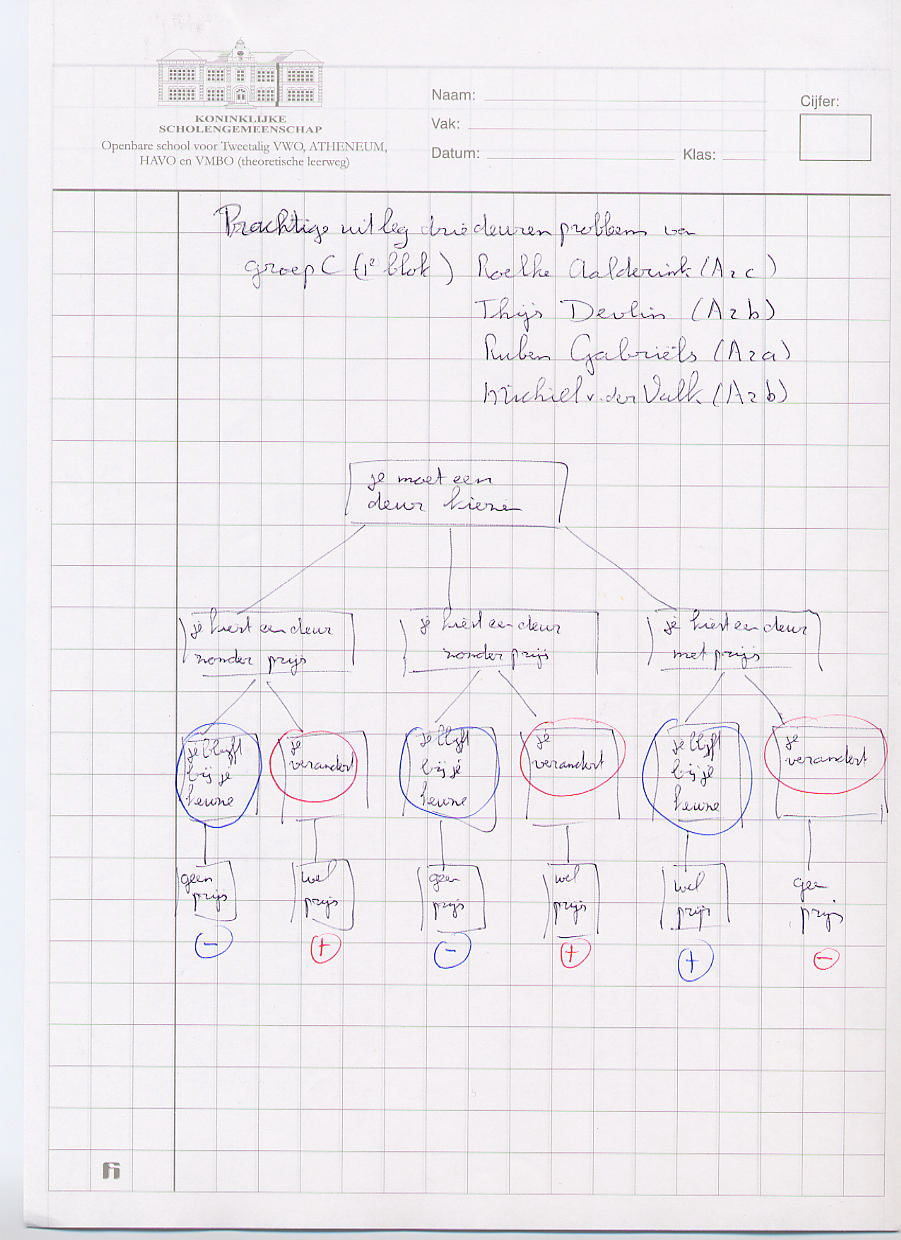

In [1]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline 
#this line above prepares IPython notebook for working with matplotlib

# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().

import numpy as np # imports a fast numerical programming library
import scipy as sp #imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes
#sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns #sets up styles and gives us more plotting options

## Solution design
Based on a large number of runs we want to calculate the average chance to win the prize if the contestant remains at the door and the chance if contestant switches to another door. 

So we need winning door percentages for these two situations: 
1. remain at door. Input needed: contestants chosen door and the winning door
2. switch doors. Input needed: contestants new guess and winning door

We need some functions
1. simulate the winning door. As there are 3 doors ad random choose one of them as winning door.
2. simulate the contestants guess. 
3. simulate one of the non-winning doors different from contestants choice and winning door.
4. switch to other door (if contestant decides so); different from contestants guess and opened non-winning door
5. calculate the winning percentage

### Example data
Throughout the code nsim for function testing = 5. Functions `non_winning_door()` and `switch_door()` use:  
* winning_doors [0, 2, 1, 0, 1]  
* contestant_guess [ 1, 1, 0, 0, 2]

In [63]:
"""
Random array of winning doors (values 0, 1 or 2).
numpy.random.randint(low, high, size) where high is exclusive meaning 0, 1 or 2
"""
def simulate_prizedoor(nsim) :
    return np.random.randint(0, 3, nsim)

print (simulate_prizedoor(5))


[0 0 0 2 1]


In [79]:
"""
Random array of contestant's door choices (values 0, 1 or 2).
Henk: no idea why example returned array filled with 0's (always 1st door)
"""

def simulate_guess(nsim) :
    """return np.zeros(nsim, dtype=int)"""    
    return np.random.randint(0, 3, nsim)

print (simulate_guess(5))

[0 9 8 1 6 1 9 4 5 3 8 0 6 6 3]


In [68]:
"""
Non-winning door array (values 0, 1 or 2). 
Input: winningdoors and guesses (contenstant_guess).
Approach:
per simulation return value other than winning_door or guess
Example:
winningdoors       [0, 2, 1, 0, 1]
contenstant_guess  [1, 1, 0, 0, 2]
RESULTS expected    2, 0, 2, 1, 0 (or 2, 0, 2, 2, 0)
"""
def goat_door(winningdoors, guesses) :
    results = []
    for winning_door, guess in zip(winningdoors, guesses) :
        result = np.random.randint(0, 3)
        """as long as result == winning_door OR result === guess, provide new result"""
        while result == winning_door or result == guess :
            result = np.random.randint(0, 3)
        results.append(result)
    return results

print (goat_door(np.array([0, 2, 1, 0, 1]), np.array([1, 1, 0, 0, 2])))
print (goat_door(np.array([0, 1, 2]), np.array([1, 1, 1])))

[2, 0, 2, 2, 0]
[2, 2, 0]


In [70]:
"""
Contestant switches to other door. 
Input: nonwinningdoors (opened by host) and guesses (contestant_guess)
Approach: per simulation return other than non_winning_door or guess
Example:
nonwinningdoors    [2, 0, 2, 1, 0]
contestant_guess   [1, 1, 0, 0, 2]
RESULTS expected    0, 2, 1, 2, 1
"""
def switch_guess(nonwinningdoors, guesses) :
    results = []
    for non_winning_door, guess in zip(nonwinningdoors, guesses):
        result = np.random.randint(0, 3)
        while result == non_winning_door or result == guess:
            result = np.random.randint(0, 3)
        results.append(result)
    return results

print (switch_guess(np.array([2, 0, 2, 1, 0]), np.array([1, 1, 0, 0, 2])))
print (switch_guess(np.array([0, 1, 2]), np.array([1, 2, 1])))


[0, 2, 1, 2, 1]
[2, 0, 0]


In [39]:
def win_percentage(winning_doors, guesses):
    return 100 * (winning_doors == guesses).mean()

print (win_percentage(np.array([0, 1, 2]), np.array([0, 0, 0])))

33.33333333333333


In [75]:
nsim = 10000
wd = simulate_prizedoor(nsim)
guess = simulate_guess(nsim)

#keep guesses
print ("Win percentage when keeping original door")
print (win_percentage(wd, guess))

#switch
goats = goat_door(wd, guess)
guess = switch_guess(guess, goats)
print ("Win percentage when switching doors")
print (win_percentage(wd, guess))

Win percentage when keeping original door
33.52
Win percentage when switching doors
66.47999999999999


### Remarks on Harvard 2015 solution
* function `simulate_guess()`. Instead of `np.zeros()` using `np.random.randint()` which doesn't limit contestant's guess to just door 1. Function now equal to `simulate_prizedoor()`; **could use 1 instead**
* function `goat_door()` rewritten.
* function `switch_guess()` rewritten (don't understand Harvard's `switch` assignement and use). Function now equal to `goat_door()`. **could use 1 instead**
* in main code moved `simulate_prizedoor()` and `simulate_guess()` to top just after `nsim` assignment. So same arrays for branches "keep guesses" and "switch".
* in main code removed trailing `.mean()` from `win_percentage(wd, guess)` because it's already included in that function
* did not experiment this case for `n` doors, but changing the high value of `np.random.randint()` should be sufficient to do so. Preferably a variable that is either passed as function param or defined elsewhere and included
